### Dataset Overview:

The medical insurance dataset encompasses various factors influencing medical expenses, 

such as age, sex, BMI, smoking status, number of children, and region.

This dataset serves as a foundation for training machine learning models capable of forecasting medical expenses for new policyholders.

Its purpose is to shed light on the pivotal elements contributing to increased insurance costs,

aiding the company in making more informed decisions concerning pricing and risk assessment.

<img src="https://mayaonmoney.co.za/wp-content/uploads/2022/05/medical-insurance.jpg" width=1000>

#### The dataset comprises 2.7K rows and 7 columns, including:

## Data Dictionary
| Column | Description |
| --- | --- |
| Age | Age of the Person|
| Sex | Sex of the Person|
| BMI | Body Mass Index|
| Childern | Number of Children |
| Smoker | Smoker or Non-smoker | 
| Region | Region |
| Charges | Insurance Price|

## Objectives Statement

This project aims to revolutionize medical insurance charge estimation through cutting-edge machine learning algorithms. By harnessing the power of advanced data analytics and predictive modeling, our goal is to develop a robust system capable of accurately predicting insurance charges. Our solution will analyze a diverse range of medical and demographic data, empowering insurance providers and policyholders to make informed decisions and better financial plans.

Through this endeavor, we aspire to enhance transparency and efficiency in the insurance industry while ensuring individuals receive fair and accurate estimates for their medical expenses. Join us as we embark on this journey of exploration, unraveling the hidden insights within the data and reshaping the landscape of insurance charge estimation.


In [1]:
#Importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Some Numerical Information about the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [4]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [5]:
# See distribution of categorical values
cols = ['sex', 'smoker', 'region']

for col in cols :
    print(df[col].value_counts(), '\n')

sex
male      1406
female    1366
Name: count, dtype: int64 

smoker
no     2208
yes     564
Name: count, dtype: int64 

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64 



## Data Cleaning 🧹

### Distribution of Charges and BMI

This subplot grid consists of two box plots illustrating the distribution of medical insurance charges and BMI (Body Mass Index) within the dataset.

- **Left Plot:** Distribution of Charges
  - The box plot displays the spread of medical insurance charges, indicating the median, quartiles, and outliers.

- **Right Plot:** Distribution of BMI
  - The box plot shows the spread of BMI values, representing the median, quartiles, and outliers.

These visualizations provide insights into the distribution and variability of charges and BMI among the dataset.


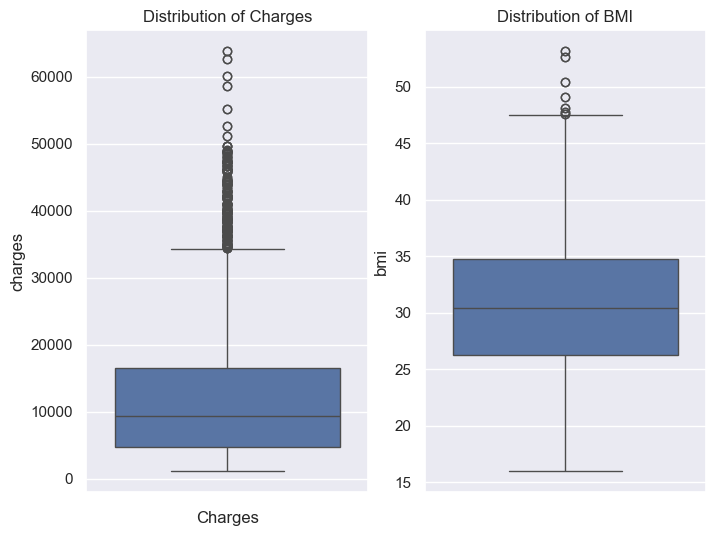

In [6]:
# Visualize the distribution of Charges and BMI using a box plot
fig, ax = plt.subplots(1, 2, figsize=(8,6))
sns.boxplot(df['charges'], ax = ax[0])
ax[0].set_title('Distribution of Charges')
ax[0].set_xlabel('Charges')
sns.boxplot(df['bmi'], ax=ax[1])
ax[1].set_title('Distribution of BMI')
plt.show()

### removing outlier

In [7]:
df = df[df['charges']< 50000]
df.shape

(2758, 7)

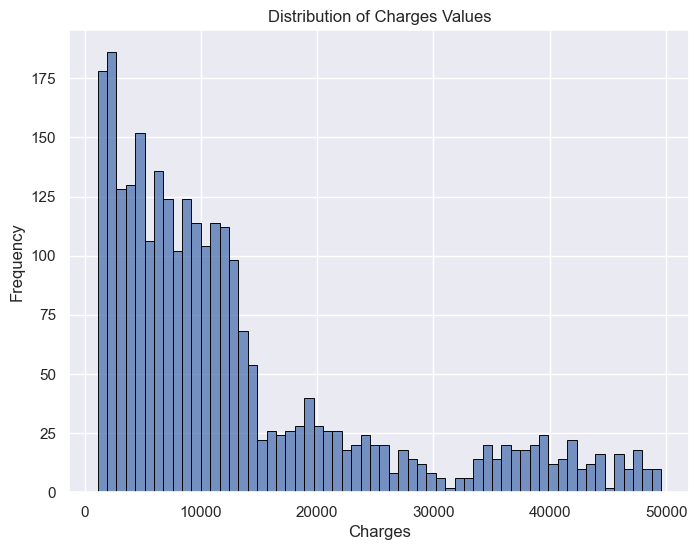

In [8]:
# Visualize the distribution after removing outliers
plt.figure(figsize=(8,6))
sns.histplot(df['charges'], bins=60, edgecolor='black')
plt.title('Distribution of Charges Values')
plt.ylabel('Frequency')
plt.xlabel('Charges')
plt.show()

## Creating Age Groups

Age groups have been created based on the 'age' column in the dataset. The age ranges have been categorized into six groups: 18-25, 26-33, 34-41, 42-49, 50-57, and 58-65. This allows for easier analysis and visualization of age-related patterns in the data.


In [9]:
# Creating age groups 
df['age'] = pd.cut(x = df['age'], bins=[17, 25, 33, 41, 49, 57, 65], labels=['18-25', '26-33', '34-41', '42-49', '50-57', '58-65'])

## Data Visualization 🎨

### Pie Plot of Age Groups

This pie plot visualizes the distribution of age groups within the dataset. Each slice of the pie represents a different age group, with the size of each slice proportional to the number of individuals in that age group.

This plot helps us understand the relative proportions of different age groups within the dataset at a glance.


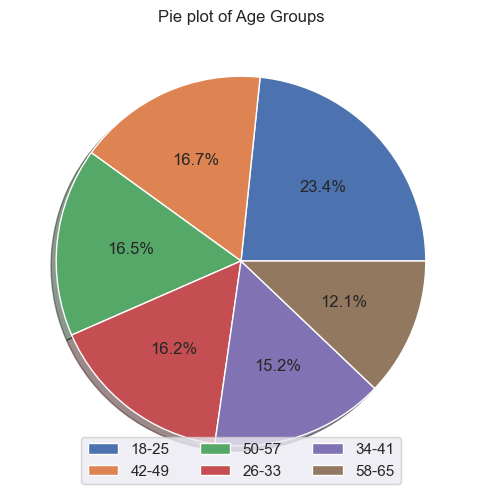

In [10]:
# Visualize the distribution of Age 
age_plot = df['age'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(age_plot, shadow=True, autopct='%1.1f%%')
plt.legend(labels=age_plot.index, loc='lower center', ncols=3)
plt.title('Pie plot of Age Groups')
plt.show()

### Categorical Variables Distribution

This subplot grid displays the distribution of Smoker, Children, Sex, and Region categories using pie charts.


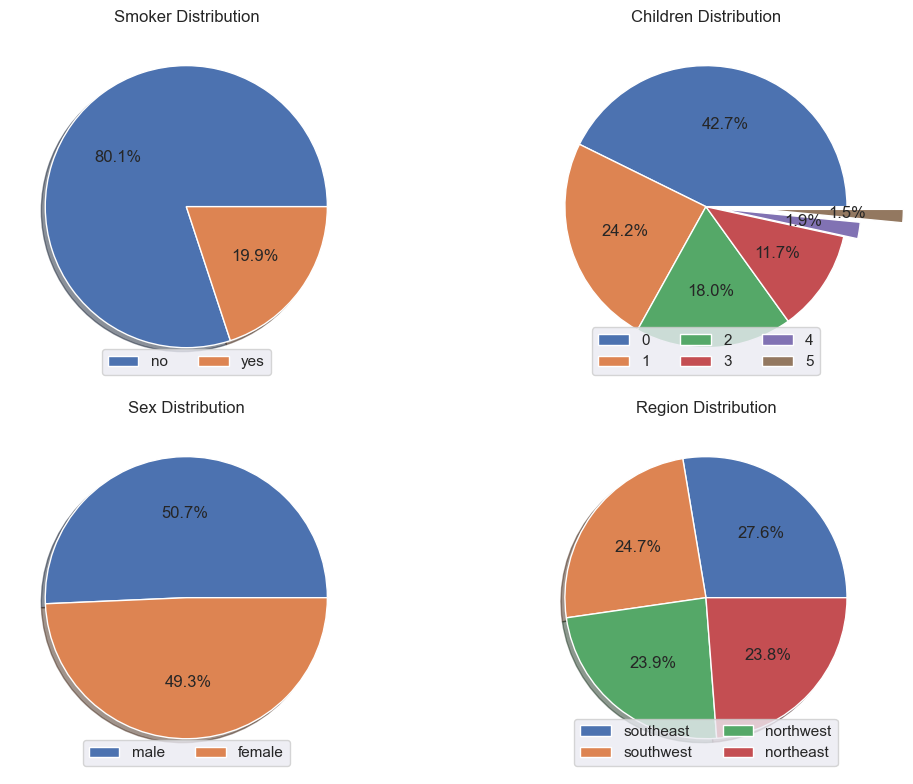

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

# Visualize the distribution of Smoker 
smoker_plot = df['smoker'].value_counts()
ax[0][0].pie(smoker_plot, shadow=True, autopct='%1.1f%%')
ax[0][0].legend(labels=smoker_plot.index, loc='lower center', ncols=3)
ax[0][0].set_title('Smoker Distribution')

# Visualize the distribution of Children 
children_plot = df['children'].value_counts()
ax[0][1].pie(children_plot, shadow=False, autopct='%1.1f%%', explode=[0, 0, 0, 0, 0.1, 0.4])
ax[0][1].legend(labels=children_plot.index, loc='lower center', ncols=3)
ax[0][1].set_title('Children Distribution')

# Visualize the distribution of Sex 
sex_plot = df['sex'].value_counts()
ax[1][0].pie(sex_plot, shadow=True, autopct='%1.1f%%')
ax[1][0].legend(labels=sex_plot.index, loc='lower center', ncols=2)
ax[1][0].set_title('Sex Distribution')

# Visualize the distribution of Region 
region_plot = df['region'].value_counts()
ax[1][1].pie(region_plot, shadow=True, autopct='%1.1f%%')
ax[1][1].legend(labels=region_plot.index, loc='lower center', ncols=2)
ax[1][1].set_title('Region Distribution')

plt.tight_layout()
plt.show()

### Average Charge by Age

This horizontal bar chart illustrates the average medical insurance charges across different age groups. Each bar represents the average charge for a specific age group. The chart provides insights into how charges vary with age.


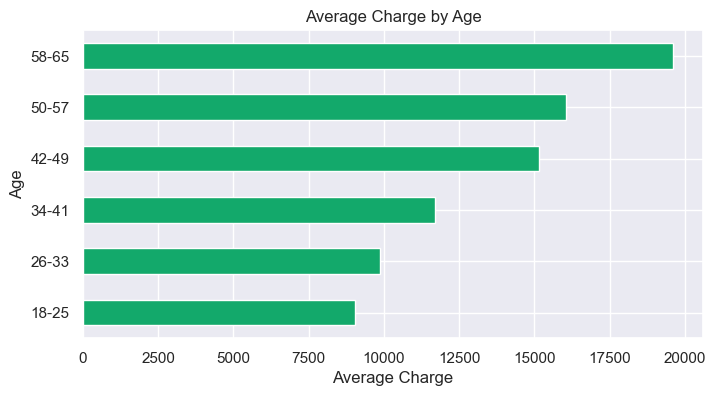

In [12]:
# Visualize the average Charge by Age Groups
plt.figure(figsize=(8,4))
average_charge_by_age = df.groupby(['age'])['charges'].mean()
average_charge_by_age.plot(kind='barh', color = '#13a96b')
plt.title('Average Charge by Age')
plt.xlabel('Average Charge')
plt.ylabel('Age')
plt.show()

### Average Charge by Region

This horizontal bar chart displays the average medical insurance charges across different regions. Each bar represents the average charge for a specific region. The visualization helps understand how charges vary by geographical location.


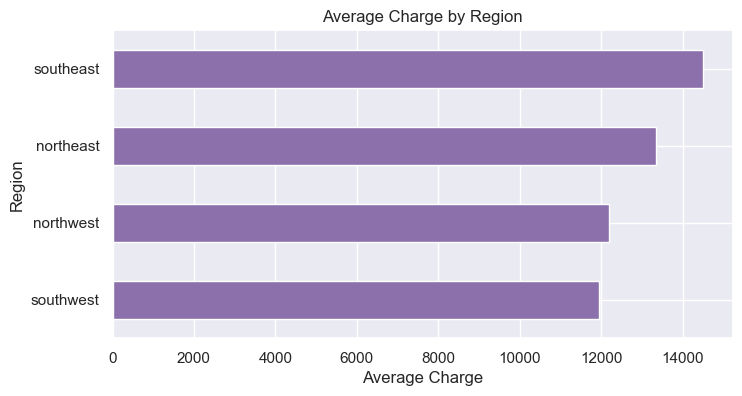

In [13]:
# Visualize the average Charge by Region
plt.figure(figsize=(8,4))
region_count = df.groupby(['region'])['charges'].mean()
region_count.sort_values(ascending=True, inplace=True)
region_count.plot(kind='barh', color = '#8c70ac')
plt.title('Average Charge by Region')
plt.xlabel('Average Charge')
plt.ylabel('Region')
plt.show()

### Average Charge by Number of Children

This horizontal bar chart illustrates the average medical insurance charges based on the number of children. Each bar represents the average charge for a specific number of children. The visualization provides insights into how charges vary with the number of dependents.


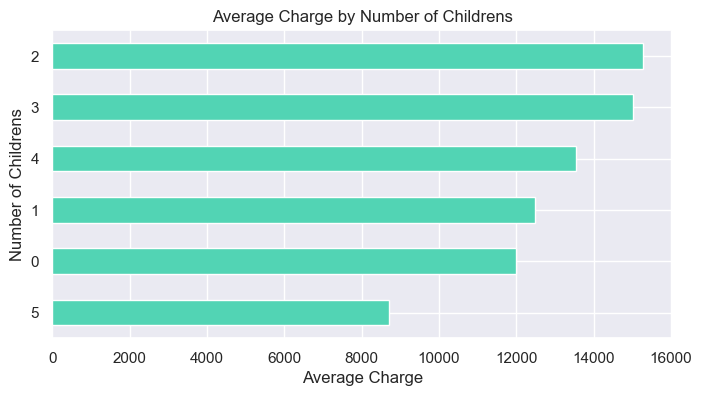

In [14]:
# Visualize the average Charge by Children
plt.figure(figsize=(8,4))
children_count = df.groupby(['children'])['charges'].mean()
children_count.sort_values(ascending=True, inplace=True)
children_count.plot(kind='barh', color = '#52d4b4')
plt.title('Average Charge by Number of Childrens')
plt.xlabel('Average Charge')
plt.ylabel('Number of Childrens')
plt.show()

### Smoking Status by Number of Children

This horizontal bar chart illustrates the distribution of smoking status among individuals with different numbers of children. Each bar represents the count of smokers and non-smokers within a specific number of children category. The visualization helps understand the relationship between smoking status and family size.


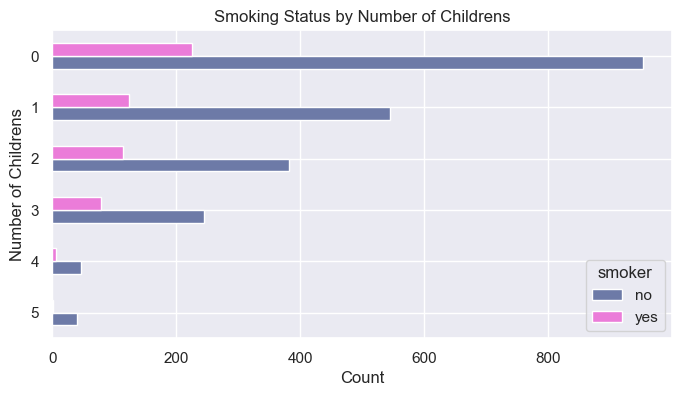

In [15]:
# Visualize the Smoker Status by Number of Childrens
childs_count = df.groupby(['children', 'smoker']).size().unstack()
childs_count.sort_values(by='children',ascending=False, inplace=True)
childs_count.plot(kind='barh', figsize=(8,4), color=['#6d7aa7', '#eb7cd9'])
plt.title('Smoking Status by Number of Childrens')
plt.ylabel('Number of Childrens')
plt.xlabel('Count')
plt.show()

### Smoking Status by Number of Children

This pie chart grid visualizes the distribution of smoking status among individuals with different numbers of children. Each pie chart represents a specific number of children category, and the slices within each pie chart depict the proportion of smokers and non-smokers. The visualization offers a quick comparison of smoking status across different family sizes.


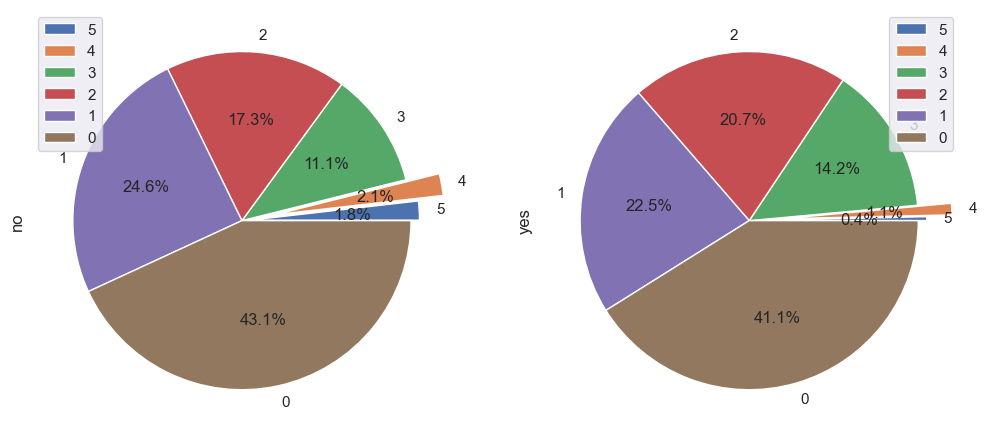

In [16]:
# Visualize the Smoker Status by Number of Childrens
explode = [0.05, 0.2, 0, 0, 0, 0]
childs_count.plot(kind='pie',shadow=False, subplots=True, figsize=(12,8), autopct='%1.1f%%', explode=explode)
plt.show()

### Box Plot of Charges by Age and Sex

This box plot illustrates the distribution of medical insurance charges across different age groups, categorized by sex. Each box represents the interquartile range (IQR) of charges within a specific age group, with the median charge indicated by the horizontal line inside the box. The plot allows comparison of charge distributions between male and female individuals across di


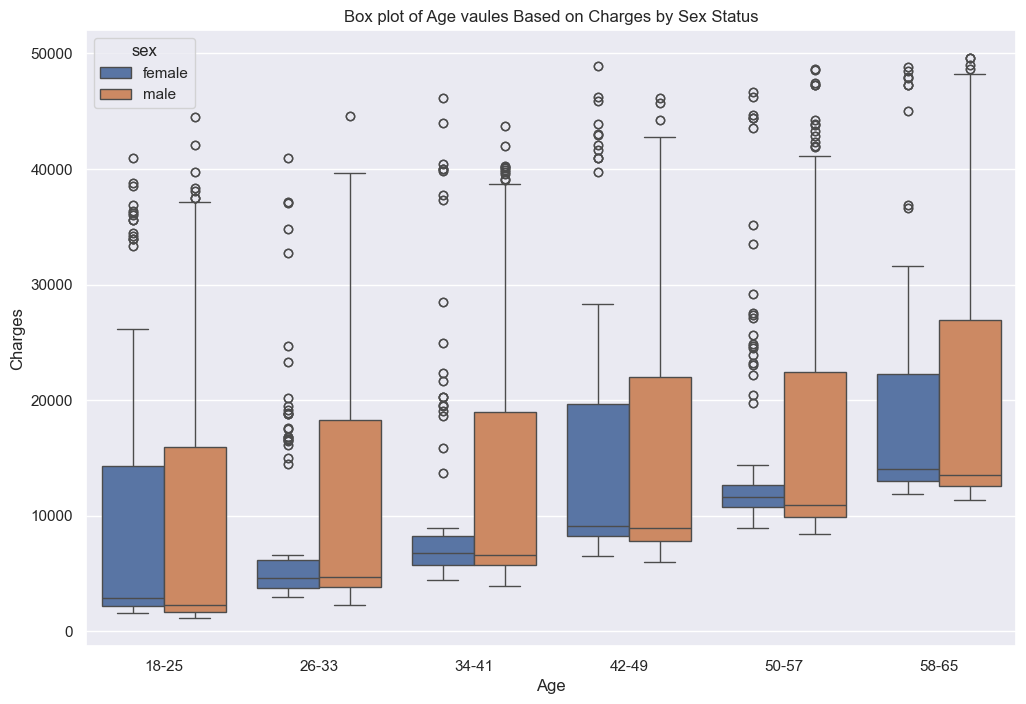

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'age', y= 'charges', hue='sex', data=df)
plt.title('Box plot of Age vaules Based on Charges by Sex Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

### Box Plot of Charges by Number of Children and Sex

This box plot illustrates the distribution of medical insurance charges based on the number of children, categorized by sex. Each box represents the interquartile range (IQR) of charges within a specific number of children category, with the median charge indicated by the horizontal line inside the box. The plot enables comparison of charge distributions between male and female individuals across different family siz


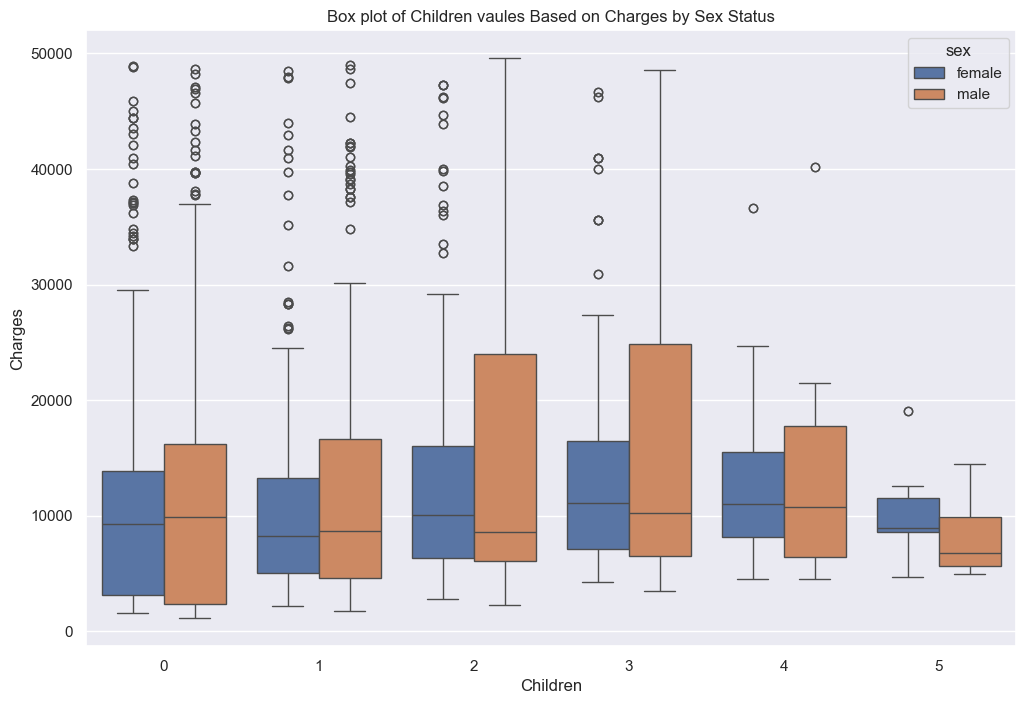

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'children', y= 'charges', hue='sex', data=df)
plt.title('Box plot of Children vaules Based on Charges by Sex Status')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.show()

### Box Plot of Charges by Region and Sex

This box plot illustrates the distribution of medical insurance charges across different regions, categorized by sex. Each box represents the interquartile range (IQR) of charges within a specific region, with the median charge indicated by the horizontal line inside the box. The plot enables comparison of charge distributions between male and female individuals across different geographic regions.


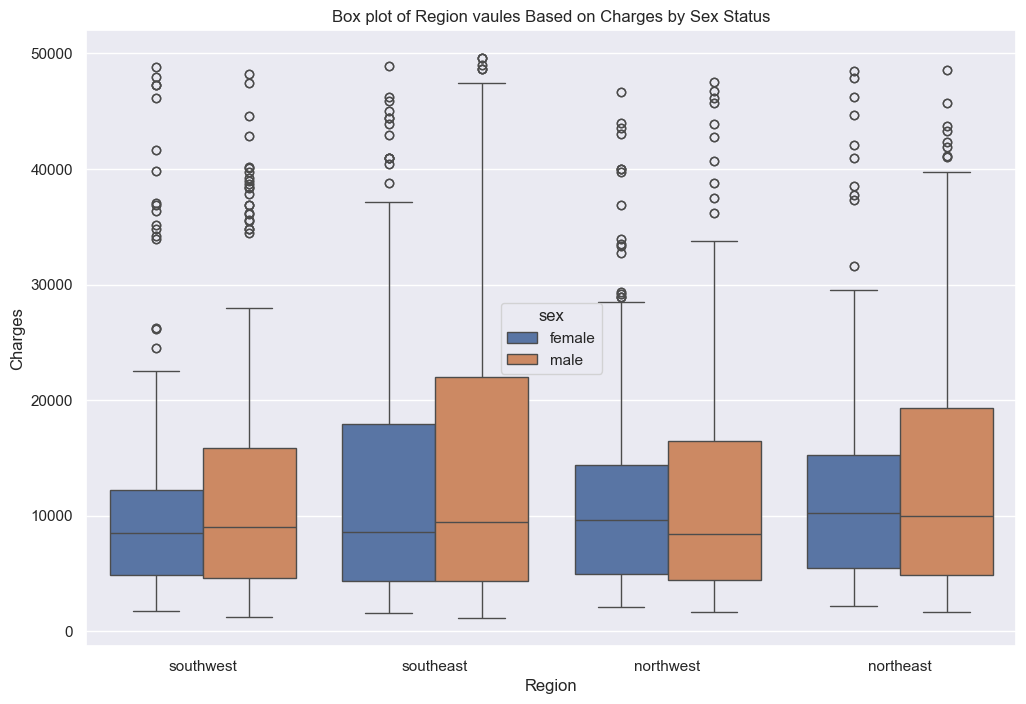

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'region', y= 'charges', hue='sex', data=df)
plt.title('Box plot of Region vaules Based on Charges by Sex Status')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

### Box Plot of BMI by Age and Sex

This box plot illustrates the distribution of BMI (Body Mass Index) across different age groups, categorized by sex. Each box represents the interquartile range (IQR) of BMI within a specific age group, with the median BMI indicated by the horizontal line inside the box. The plot allows comparison of BMI distributions between male and female individuals across different age brackets.


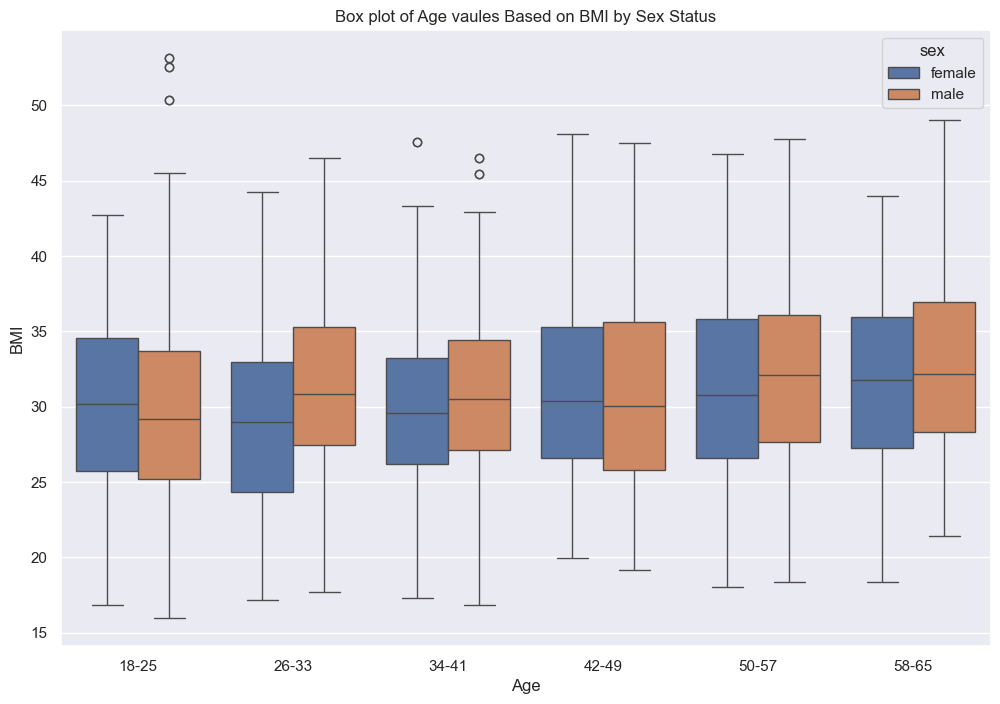

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'age', y= 'bmi', hue='sex', data=df)
plt.title('Box plot of Age vaules Based on BMI by Sex Status')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

### BMI Distribution by Age and Sex

This violin plot visualizes the distribution of BMI (Body Mass Index) across different age groups, split by sex. Each violin plot represents the distribution of BMI within a specific age group, with the width indicating the density of observations. The plot allows comparison of BMI distributions between male and female individuals across different age brac


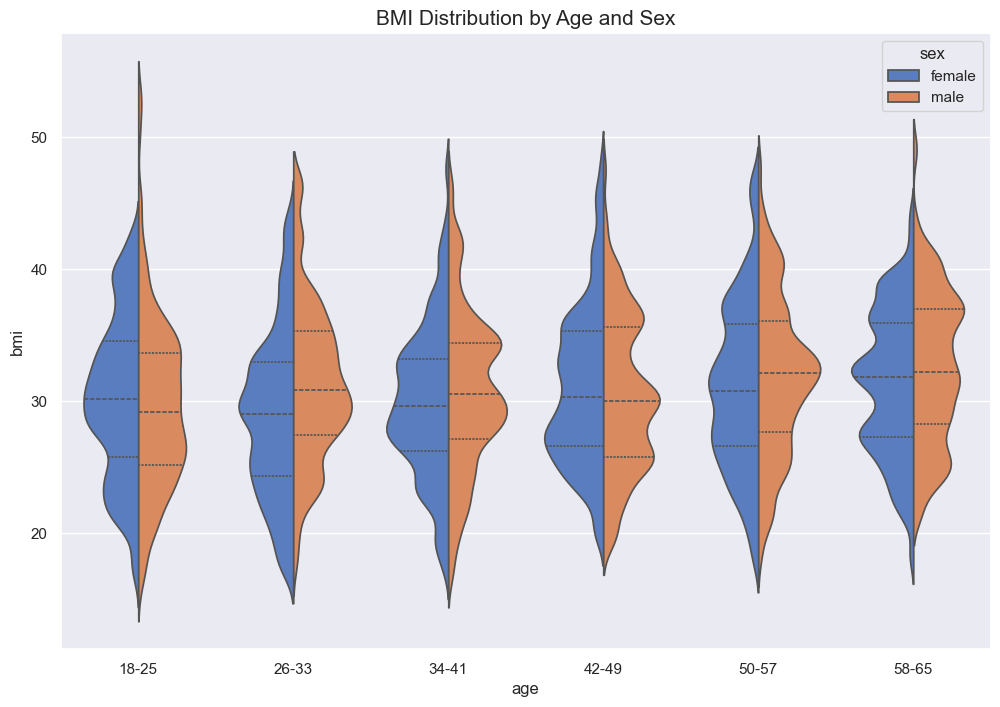

In [21]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x="age", y="bmi", hue="sex", split=True, bw=.2, inner="quart", palette="muted")
plt.title('BMI Distribution by Age and Sex', size=15)
plt.show()

## Data Preprocessing

In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
scaler = StandardScaler()

In [23]:
col = ['bmi']
cols = ['sex', 'smoker', 'age']

df[col] = scaler.fit_transform(df[col])
for col in cols :
    df[col] = le.fit_transform(df[col])

df = pd.get_dummies(df, columns=['region'])

## Training and Evaluating Different Models
### Mean Absolute Error (MAE)
MAE measures the average absolute difference between the predicted and actual values. It gives an idea of the model's accuracy.



### Mean Squared Error (MSE)
MSE measures the average squared difference between the predicted and actual values. It penalizes large errors more than MAE.



### Root Mean Squared Error (RMSE)
RMSE is the square root of the MSE. It provides an interpretable measure in the same units as the target variable.



### R-squared (R2 Score)
R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with 1 indicating a perfect fit.



### Adjusted R-squared (Adjusted R2 Score)
Adjusted R-squared adjusts the R-squared value for the number of predictors in the model. It penalizes the addition of unnecessary predictors.





## Evaluation Metrics for Decision Tree Regressor





In [24]:
from sklearn.model_selection import train_test_split 

x = df.drop(['charges'], axis=1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.tree import DecisionTreeRegressor 

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
dtr.score(x_train, y_train)

0.9982577155437403

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

dtr_pred = dtr.predict(x_test)

print('R2 Score: ', r2_score(y_test, dtr_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtr_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtr_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, dtr_pred)))

R2 Score:  0.927171084443052
Mean Squared Error:  10092934.595879912
Mean Absolute Error:  705.6091005676329
Root Mean Squared Error:  3176.9379276088966


## Evaluation Metrics for RandomForestRegressor

In [27]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf.score(x_train, y_train)

0.9913838894386967

In [28]:
rf_pred = rf.predict(x_test)

print('R2 Score: ', r2_score(y_test, rf_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rf_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rf_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, rf_pred)))

R2 Score:  0.9503470850713444
Mean Squared Error:  6881107.854446153
Mean Absolute Error:  1286.0430114547694
Root Mean Squared Error:  2623.1865839940083


## Actual vs. Predicted Prices

This scatter plot compares the actual prices (x-axis) with the predicted prices (y-axis) generated by both the Tuned Random Forest and Decision Tree models. Each point represents a data point from the test set.

- The red points represent the predicted prices by the Tuned Random Forest model.
- The blue points represent the predicted prices by the Decision Tree model.
- The dashed black line represents the ideal scenario where actual and predicted prices are identical.

The plot helps visualize how well the models' predictions align with the actual prices, with closer alignment to the dashed line indicating better prediction accuracy.



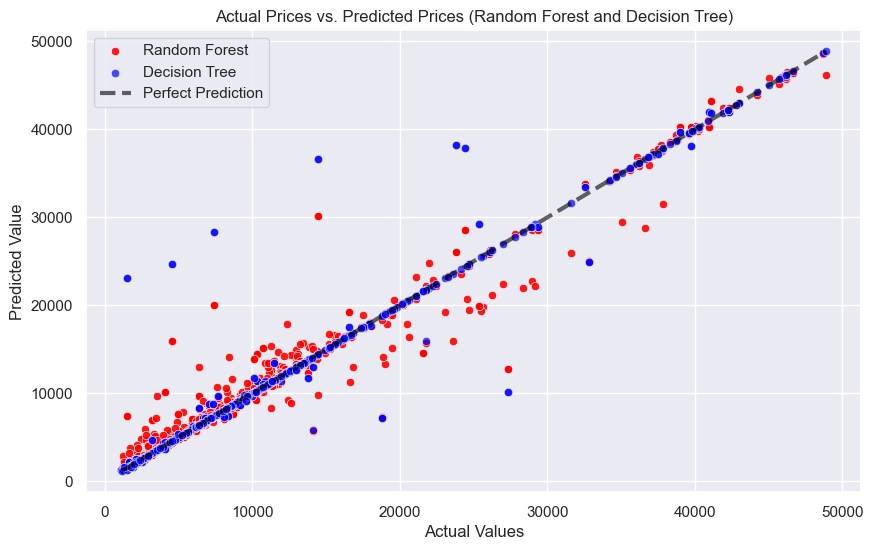

In [29]:
# Visualize the predicted prices against the actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_pred, color = 'red', alpha=0.9, label='Random Forest')
sns.scatterplot(x=y_test, y=dtr_pred, color='blue', alpha=0.7, label='Decision Tree')
sns.lineplot(x =[y_test.min(), y_test.max()], y= [y_test.min(), y_test.max()], linestyle='dashed', color = 'black', label= 'Perfect Prediction', linewidth=3, alpha=.6)
plt.title('Actual Prices vs. Predicted Prices (Random Forest and Decision Tree)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Value')
plt.legend()
plt.show()

# Conclusion

In summary, the insurance price estimation model demonstrates exceptional performance, achieving a remarkable training score of 99.1%. This score indicates the model's effectiveness in capturing patterns and relationships within the training data. Moreover, the robust testing score of 95.2% highlights the model's ability to generalize well to unseen instances, reflecting its reliability in real-world scenarios.

Furthermore, the model exhibits impressive accuracy with a Mean Squared Error (MSE) of 6,651,886 and a Root Mean Squared Error (RMSE) of 2,579. These low error metrics underscore the model's capability to make precise predictions, crucial for insurance price estimation tasks. Overall, the model's high accuracy, coupled with its strong generalization performance, instills confidence in its practical application for insurance price estimation.
For any questions or feedback, please feel free to reach out to the project maintainer at [ mahditajdari09@gmail.com , huseinmohammadi83@gmail.com ]

### Developed by Mahdi Tajdari and Hosein Mohammadi 